# K-Nearest-Neighbor practical

In this practical, we will explore the K Nearest Neighbors (KNN) algorithm, a simple yet powerful method used for classification tasks. KNN classifies new cases based on a similarity measure (e.g., distance functions). A case is classified by a majority vote of its neighbors, with the case being assigned to the class most common among its k nearest neighbors measured by a distance function. This practical will guide you through implementing KNN to classify instances of the Breast Cancer Wisconsin (diagnostic) dataset, aiming to predict whether a tumor is malignant or benign based on various attributes.

### Step 1: Understanding the KNN Classifier

Before diving into the code, let's briefly review the KNN algorithm. KNN is a type of instance-based or lazy learning, where the function is only approximated locally, and all computation is deferred until classification. The KNN algorithm has the following steps:


- Choose the number of k and a distance metric.
- Find the k nearest neighbors of the sample that we want to classify.
- Assign the class label by majority vote.

### Step 2: Loading and Analyzing the Dataset

First, we need to load the dataset and perform some preliminary analysis to understand its structure and contents.

Use: `from sklearn.datasets import load_breast_cancer`

In addition compute some statistics on the dataset

- Number of samples
- Number of features
- Label proportions
- ...

In [3]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='diagnosis')

In [4]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
X.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
y.value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

### Step 3: Data Preprocessing

Before applying KNN, it's essential to split the dataset into a training set and a testing set. This allows us to evaluate the performance of our model on unseen data. Keep 30% of the dataset for test.

In [7]:
from sklearn.model_selection import train_test_split

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Display sizes
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Training set size: 398 samples
Test set size: 171 samples


### Step 4: Training the KNN Classifier

We will start with a simple KNN model using only one neighbor to classify the new instances.

In [8]:
from sklearn.neighbors import KNeighborsClassifier

# Define a KNN classifier
one_NN = KNeighborsClassifier(n_neighbors=1, algorithm='brute')

# Train the classifier
one_NN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', n_neighbors=1)

Evaluate the performances of the classifier. Compute the accuracy on the training and on the test set.

In [9]:
# Evaluate the classifier
print(f"Training accuracy: {one_NN.score(X_train, y_train)}")
print(f"Test accuracy: {one_NN.score(X_test, y_test)}")

Training accuracy: 1.0
Test accuracy: 0.9239766081871345


Now display the confusion matrix

In [13]:
from sklearn.metrics import confusion_matrix

# Assuming you have a trained model `knn` and test set `X_test`, `y_test`
y_pred = knn.predict(X_test)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 55   8]
 [  1 107]]


Display the metrics:
- precision
- recall
- f1-score

In [14]:
from sklearn.metrics import precision_score, recall_score, f1_score



# Precision
precision = precision_score(y_test, y_pred, average='binary')
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred, average='binary')
print("Recall:", recall)

# F1 Score
f1 = f1_score(y_test, y_pred, average='binary')
print("F1 Score:", f1)

Precision: 0.9304347826086956
Recall: 0.9907407407407407
F1 Score: 0.9596412556053812


In this part of the practical, you'll perform an experiment where you'll vary the size of the test set and observe how it impacts the accuracy of the KNN classifier. You will use multiple test set sizes: 5%, 10%, 15%, 20%, 30%, 50%, 70%, 90% and 95%. For each proportion:

- Split the dataset into a training set and a test set according to the specified proportion.

- Train a KNN classifier on the training set.

- Compute and store the accuracy on the test set.

- Plot the accuracy against the test set size to analyze the relationship between test set size and model performance.

This experiment will provide insights into the trade-off between using more data for training versus leaving enough data for a meaningful evaluation of the model's performance.

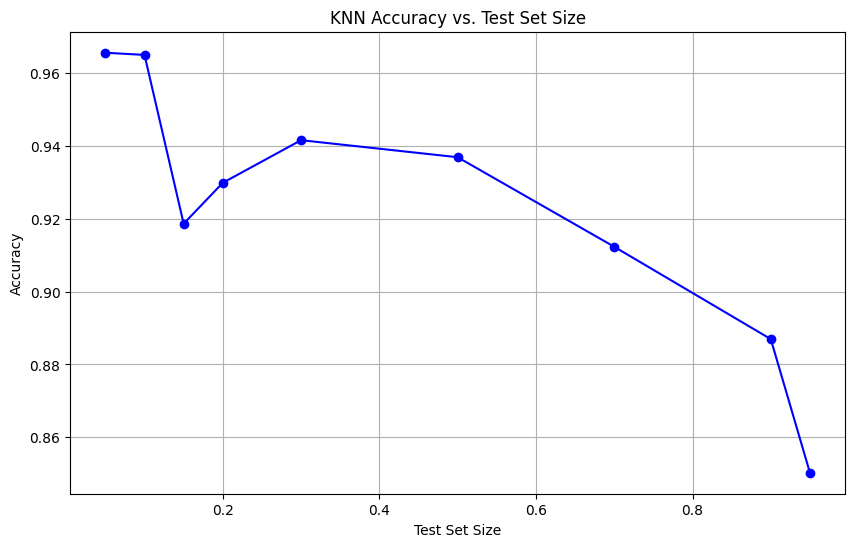

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Define test set sizes
test_sizes = [0.05, 0.1, 0.15, 0.2, 0.3, 0.5, 0.70, 0.90, 0.95]
accuracies = []

# Loop over each test set size
for test_size in test_sizes:
    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Train KNN classifier
    knn = KNeighborsClassifier(n_neighbors=3)  # Using k=3 for a balanced approach
    knn.fit(X_train, y_train)

    # Compute accuracy and store it
    accuracy = knn.score(X_test, y_test)
    accuracies.append(accuracy)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(test_sizes, accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('Test Set Size')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs. Test Set Size')
plt.grid(True)
plt.show()

### Step 5: Exploring Different Values of K

Investigate how the choice of k affects the model's performance and decision boundaries.

Use test_size=0.3

And then train a KNN classifier for different values of k. Then plot the train / test accuracy according to k values

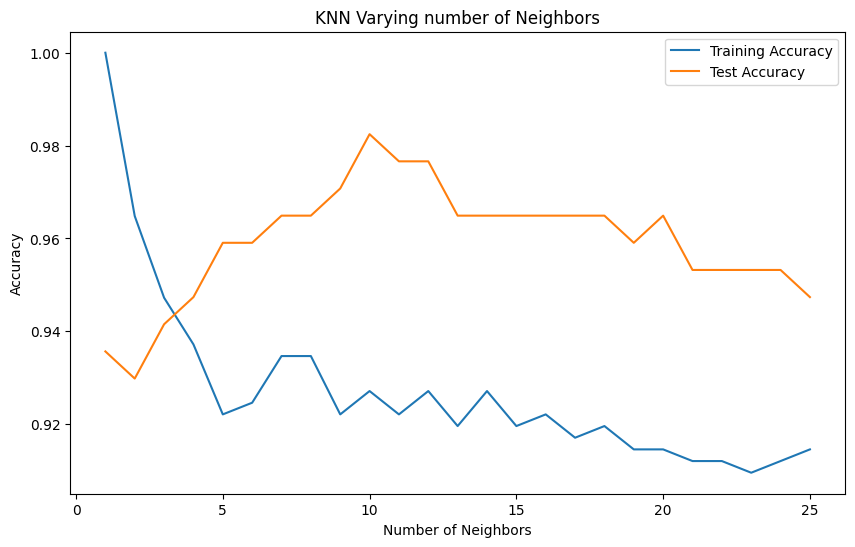

In [12]:
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Test various values of k
k_values = range(1, 26)
train_accuracies = []
test_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracies.append(knn.score(X_train, y_train))
    test_accuracies.append(knn.score(X_test, y_test))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracies, label='Training Accuracy')
plt.plot(k_values, test_accuracies, label='Test Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Varying number of Neighbors')
plt.legend()
plt.show()
